# Implementing a Neural Network with a single hidden layer

In this assignment you will learn to implement a single hidden layer neural network and apply it on a toy dataset. Neural networks are a powerful tool for binary classification. In a binary classification problem, each input belongs to one of two classes, say 0 or 1, and the goal is to predict the correct class of each input. 

Neural networks are very machine learning algorithm which can approximate complex relationships between target variable(dependent variable) and the features(independent variable) of the input. This assignment is a stepping stone for more complex neural networks with multiple hidden layers.

#### Instructions
-  Do not use any additional libraries other than what is already specified below
-  Do not use loops in your code, use numpy for vectorized implementation
-  Do not edit expected results markdown cells


In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# to plot matplotlib in notebook cells
%matplotlib --inline

UsageError: unrecognized arguments: --inline


http://cs231n.github.io/neural-networks-case-study/

https://cs.stanford.edu/people/karpathy/cs231nfiles/minimal_net.html

This notebook and the week3 of Neural Networks and deep learning was used for this assignment


### Creating the data

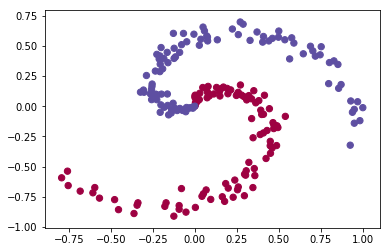

In [16]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 2 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [17]:
# this notebook uses features
y_full = np.expand_dims(y,1).T
X_full = X.T

print("shape of input",X.shape)
print("shape of target",y.shape)

shape of input (200, 2)
shape of target (200,)


###  Data Representation and Parameters
Assuming there are $m$ training samples, the pair $(x^{(i)}, \hat{y}^{(i)})$ denote the $i^{th}$ training sample. Each training sample consists of $n$ features denoted by $x^{(i)}$ and the correponding class label $\hat{y}^{(i)}$. For each training sample, the features $x^{(i)}$ can be thought of as an $n\times1$ column vector. When we use $n$ features for representing an input, the number of parameters in logistic regression becomes $n+1$ where the first $n$ parameters are the weights $w$ and the last parameter is the bias term $b$. The optimal values for these parameters are determined during the training phase which consists of forward propagation and back propagation such that the parameters maximize the accuracy of predicting the values of $\hat{y}^{(i)}$.

For vectorized operations, we arrange the column vectors corresponding to all the features of the training samples in the form of a $n \times m$ matrix $X$, the ground truth class labels as a $1 \times m$ row vector $\hat{y}$, and the weight parameters $w$ as a $n \times 1$ column vector. Here is an example of three training samples each containing two features with class labels 0, 1, 0 respectively.
$
\begin{align*}
    x^{(1)} &= \begin{bmatrix}
           1 \\
           2 \\
         \end{bmatrix};
         &
    x^{(2)} &= \begin{bmatrix}
           3 \\
           4 \\
         \end{bmatrix};
         &
     x^{(3)} &= \begin{bmatrix}
       5 \\
       6 \\
     \end{bmatrix}.
     &
     \textrm{Then,}\;
     X &= \begin{bmatrix}
           1\;3\;5 \\
           2\;4\;6\\
         \end{bmatrix},
     &
     \hat y &= \begin{bmatrix}
           0\;1\;0
         \end{bmatrix}.
\end{align*}
$

And the parameters to be estimated are the weights
$
\begin{align*}
     w &= \begin{bmatrix}
           w_1\\
           w_2\\
         \end{bmatrix}, 
\end{align*}
$
and the bias $b$.


 
Use the cell below to create the parameters $w$ and $b$ and initialize them with zeros.


In [6]:
# use the sigmoid code from the previous exercise
def sigmoid(z):
    s = 1.0/(1+np.exp(-z))
    return s

### Create Weight and Bias variables

We want to create a hiden layer and an output layer.
So create two weight matrixes w1 and w2 
Create two bias vectors b1 and b2

In [7]:
def create_params(input_dim, hidden_dim, output_dim):
    param_dict = {}
    param_dict['w1'] = np.random.randn(hidden_dim, input_dim) * 0.01
#     w1 = np.zeros((hidden_dim, input_dim))
    param_dict['b1'] = np.zeros((hidden_dim,1))
    param_dict['w2'] = np.random.randn(output_dim, hidden_dim) * 0.01
#     w2 = np.zeros((output_dim, hidden_dim))
    param_dict['b2'] = np.zeros((output_dim,1))
    return param_dict

In [8]:
# param_check

### DONT CHANGE TEST PARAMETERS

In [9]:
w1, b1,w2, b2, X, yhat = np.array([[1,2], [1,1]]), 0, np.array([[1, 2]]), 0, np.array([[1,2], [3,4]]), np.array([[1, 0]])
param_dict = {}
param_dict['w1'] = w1
param_dict['b1'] = b1
param_dict['w2'] = w2
param_dict['b2'] = b2

### Write the forward propagation function



In [10]:
def forward_propagate(X,yhat, param_dict):
    cached_data = {}
    cached_data['z1']  = np.dot(param_dict['w1'],X)
    cached_data['a1'] = np.tanh(cached_data['z1'])+param_dict['b1']
    cached_data['z2'] = np.dot(param_dict['w2'],cached_data['a1'])
    cached_data['a2'] = sigmoid(cached_data['z2'])+param_dict['b2']
    # compute the loss: average cross-entropy loss and regularization
    loss = -np.mean(yhat*np.log(cached_data['a2']) + (1.0-yhat)*np.log(1.0-cached_data['a2']))
    return loss, cached_data

**Let us test if the forward propagation is implemented correctly**

In [11]:
loss, cached_data = forward_propagate(X,yhat, param_dict)
print ("Actiavtion 1:\n",cached_data['a1'],'\n')
print ("Activation 2:",cached_data['a2'],'\n')
print ("Loss:",loss)

Actiavtion 1:
 [[0.99999834 1.        ]
 [0.9993293  0.99998771]] 

Activation 2: [[0.95251341 0.95257302]] 

Loss: 1.5486075124160055


<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody><tr style="text-align: left;"><td>Activation 1</td><td>[[0.99999834 1.        ]</td>
<tr style="text-align: left;"><td></td><td>                                [0.9993293  0.99998771]]</td>
    
  <tr style="text-align: left;"><td>Activation 2</td><td>[[0.95251341 0.95257302]]</td>
  <tr style="text-align: left;"><td>Loss</td><td>1.5486075124160055</td>
<br/> <br/> </td> </tr></tbody>  </table>

### Write backward propagation


In [12]:
def backward_propagate(X,yhat, param_dict, cached_data):
    m = X.shape[1]
    dz2 = (cached_data['a2'] - yhat)
    dw2 = 1.0/m*np.dot(dz2, cached_data['a1'].T)
    db2 = 1.0/m*np.sum(dz2, axis=1, keepdims=True)
    dz1 = np.dot(param_dict['w2'].T, dz2) * (1 - np.power(cached_data['a1'],2))
    dw1 = 1.0/m*np.dot(dz1,X.T)
    db1 = 1.0/m*np.sum(dz1, axis=1, keepdims=True)
    return dw1, db1, dw2, db2


**Let us test if the backward propagation is implemented correctly**

In [13]:
dw1, db1, dw2, db2 = backward_propagate(X,yhat, param_dict, cached_data)

# assertions on size of dws and dbs
print(dw1,'\n')
print(db1,'\n')
print(dw2,'\n')
print(db2,'\n')

[[-7.11191900e-08 -2.21211167e-07]
 [-1.68552571e-05 -9.73876830e-05]] 

[[-7.50459887e-08]
 [-4.02662130e-05]] 

[[0.45254325 0.45255329]] 

[[0.45254322]] 



<table border="1" class="dataframe"> <thead>    <tr style="text-align: right;"> <th>Expected output:</th></tr></thead> <tbody><tr style="text-align: left;"><td>dw1</td><td>[[-7.11191900e-08 -2.21211167e-07]</td>
<tr style="text-align: left;"><td></td><td>                                [-1.68552571e-05 -9.73876830e-05]] </td>
    
  <tr style="text-align: left;"><td>db1</td><td>[[-7.50459887e-08]</td>
  <tr style="text-align: left;"><td></td><td>                                [-4.02662130e-05]]  </td>
  <tr style="text-align: left;"><td>dw2</td><td>[[0.45254325 0.45255329]] </td>
  <tr style="text-align: left;"><td>db2</td><td>[[0.45254322]] </td>
<br/> <br/> </td> </tr></tbody>  </table>

In [14]:
def fit(X,yhat, alpha = 0.005, epochs = 10000):
    n_x = X.shape[0]
    param_dict = create_params(n_x,10,1)
    alpha = 0.005
    for i in range(epochs):
        loss, cached_data = forward_propagate(X,yhat, param_dict)
        dw1,db1, dw2, db2 = backward_propagate(X,yhat, param_dict, cached_data)
        param_dict['w1'] -= alpha*dw1
        param_dict['b1'] -= alpha*db1
        param_dict['w2'] -= alpha*dw2
        param_dict['b2'] -= alpha*db2
        if i % 1000 == 0:
            print(loss)
    return param_dict
        

In [18]:
param_dict = fit(X_full,y_full)

0.6931292614648268
0.6928660414600533
0.6919362285748083
0.6881936074080502
0.6738690157225191
0.6293717299569453
0.5476192912187566
0.4754119440286506
0.4364181304642801
0.41809563879859113


### Evaluate the loss
Make sure the loss is drecreasing 
To make the model learn faster change the alpha(learning rate ) to a higher value, but make sure you are not getting nans, then reduce the alpha as we may be lossing gardients. Sigmoid function has this problem where it will lose the gradients to exploding and vanishing gardient problems which happens when the input to the sigmoid gets too big or too small.

### Evaluate model 


In [19]:
def predict(X,param_dict):
    z1  = np.dot(param_dict['w1'],X)
    a1 = np.tanh(z1)+param_dict['b1']
    z2 = np.dot(param_dict['w2'],a1)
    a2 = sigmoid(z2)+param_dict['b2']
    return a2 >= 0.5

In [21]:
# evaluate training set accuracy
predicted_class = predict(X_full,param_dict)

print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.69


### Plot the decision plane learned by the model


In [25]:
X.shape

(2, 200)

(-0.996993251779585, 1.0030067482204168)

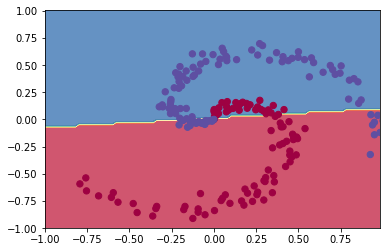

In [27]:
# plot the resulting classifier
h = 0.02
X = X_full
y = y_full
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
# Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
# Z = np.argmax(Z, axis=1)
# z1  = np.dot(param_dict['w1'],np.c_[xx.ravel(), yy.ravel()].T)
# a1 = np.tanh(z1)+param_dict['b1']
# z2 = np.dot(param_dict['w2'],a1)
# a2 = sigmoid(z2)+param_dict['b2']
a2 = predict(np.c_[xx.ravel(), yy.ravel()].T, param_dict)
Z = a2 >= 0.5
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X.T[:, 0], X.T[:, 1], c=y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

We  can see that our model fits the data by seperating the data plane to two

In [ ]:
def plot():
    pass

### Minimum accuracy
Since this is a evenly distributed dataset with o=only two classes we must atleast have an accuracy of 50 % which we can get with random predictions.

### How to improve
We can add more neurons, layer and regularization to get more accuarcy

### optional make it a class
We can add all these functions we created to a class and we will have the ability to define a  model and call . fit to train the model like we do in  scikit learn

In [28]:
class simplennmodel():
    def __init__ (self,input_dim, hidden_dim, output_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        self.create_params()
        
    def create_params(self):
        self.w1 = np.random.randn(self.hidden_dim, self.input_dim) * 0.01
        self.b1 = np.zeros((self.hidden_dim,1))
        self.w2 = np.random.randn(self.output_dim, self.hidden_dim) * 0.01
        self.b2 = np.zeros((self.output_dim,1))
        
    def forward_propagate(self,X,yhat): 
        self.z1  = np.dot(self.w1,X)
        self.a1 = np.tanh(self.z1)+self.b1
        self.z2 = np.dot(self.w2,self.a1)
        self.a2 = sigmoid(self.z2)+self.b2
        self.loss = -np.mean(yhat*np.log(self.a2) + (1.0-yhat)*np.log(1.0-self.a2))
    
    def backward_propagate(self,X,yhat):
        m = X.shape[1]
        dz2 = (self.a2 - yhat)
        dw2 = 1.0/m*np.dot(dz2, self.a1.T)
        db2 = 1.0/m*np.sum(dz2, axis=1, keepdims=True)
        dz1 = np.dot(self.w2.T, dz2) * (1 - np.power(self.a1,2))
        dw1 = 1.0/m*np.dot(dz1,X.T)
        db1 = 1.0/m*np.sum(dz1, axis=1, keepdims=True)
        return dw1, db1, dw2, db2
    
    def fit(self,X,yhat,alpha = 0.005,niter = 10000):
        n_x = X.shape[0]
        alpha = 0.005
        for i in range(niter):
            self.forward_propagate(X,yhat)
            dw1,db1, dw2, db2 = self.backward_propagate(X,yhat)
            self.w1 -= alpha*dw1
            self.b1 -= alpha*db1
            self.w2 -= alpha*dw2
            self.b2 -= alpha*db2
            if i % 1000 == 0:
                print(self.loss)
                
    def predict(self,X):
        self.z1  = np.dot(self.w1,np.c_[xx.ravel(), yy.ravel()].T)
        self.a1 = np.tanh(self.z1)+self.b1
        self.z2 = np.dot(self.w2,self.a1)
        self.a2 = sigmoid(self.z2)+self.b2
        self.predicted_class = self.a2 >= 0.5
#         print ('training accuracy: %.2f' % (np.mean(predicted_class == y)*100))
#         return self.predicted _class
        
    
    
    

In [29]:
# diamentions of each layer
n_x = X.shape[0]
n_h = 10
n_o = 1
# initialize the model
model = simplennmodel(n_x, n_h, n_o)

In [30]:
# training
model.fit(X, y)

0.6931285766171597
0.69295321850693
0.6923173182501026
0.6897433290011918
0.6797357187033066
0.6468681578937209
0.5771353143053957
0.5008776323347764
0.4521514661352073
0.42725548649885176


In [31]:
# predicted_result, accuracy = model.predict(X, yhat)
# model.predict(X, yhat)
model.predict(X)
predicted_class = model.a2 >= 0.5
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.00


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """


### Desicion plane visualization

(-0.996993251779585, 1.0030067482204168)

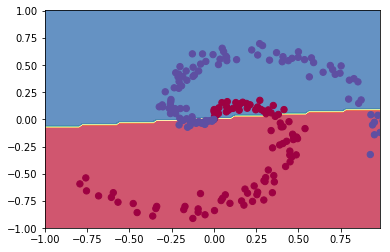

In [32]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
model.predict(np.c_[xx.ravel(), yy.ravel()].T)
Z = model.predicted_class >= 0.5
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X.T[:, 0], X.T[:, 1], c=y[0,:], s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())